# EDA of Wine Data

Step 1. Load cleaned data into a data frames for each set of data.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from data_cleaner import DataCleaner

In [2]:
input_folder = "Data/02.10.2024"  # Path to the folder containing CSV files
output_file = "cleaned_data.csv"  # Path where cleaned data will be saved

RawWineData = pd.DataFrame()

# Loop through all CSV files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        print(f"Processing file: {filename}")
        file_path = os.path.join(input_folder, filename)
        df = pd.read_csv(file_path)

        # Append the cleaned data to the final dataframe
        RawWineData = pd.concat([RawWineData, df])

print(
    f"Data compiling complete. Rows in data: {len(RawWineData)}")

Processing file: blacktie_0210.csv
Processing file: moscato_0210.csv
Processing file: namaqua_0210.csv
Processing file: SilverMyn_0210.csv
Processing file: sophie_0210.csv
Processing file: tallhorse_0210.csv
Data compiling complete. Rows in data: 90464


In [3]:
# Initialize the DataCleaner with folder path and output file
cleaner = DataCleaner(input_folder, cleaning_method='z_score')
cleanedData = cleaner.clean_data()  # Call the cleaning function

Processing file: blacktie_0210.csv
Original number of rows: 13645
Rows after dropping nulls: 13640
Rows after removing NaNs from sensor columns: 13640
Rows before: 13640, Rows cleaned after Z-Score: 418
Total rows cleaned: 423
____________________
Processing file: moscato_0210.csv
Original number of rows: 14171
Rows after dropping nulls: 14167
Rows after removing NaNs from sensor columns: 14167
Rows before: 14167, Rows cleaned after Z-Score: 118
Total rows cleaned: 122
____________________
Processing file: namaqua_0210.csv
Original number of rows: 15977
Rows after dropping nulls: 15976
Rows after removing NaNs from sensor columns: 15976
Rows before: 15976, Rows cleaned after Z-Score: 640
Total rows cleaned: 641
____________________
Processing file: SilverMyn_0210.csv
Original number of rows: 16206
Rows after dropping nulls: 16204
Rows after removing NaNs from sensor columns: 16202
Rows before: 16202, Rows cleaned after Z-Score: 478
Total rows cleaned: 482
____________________
Processin

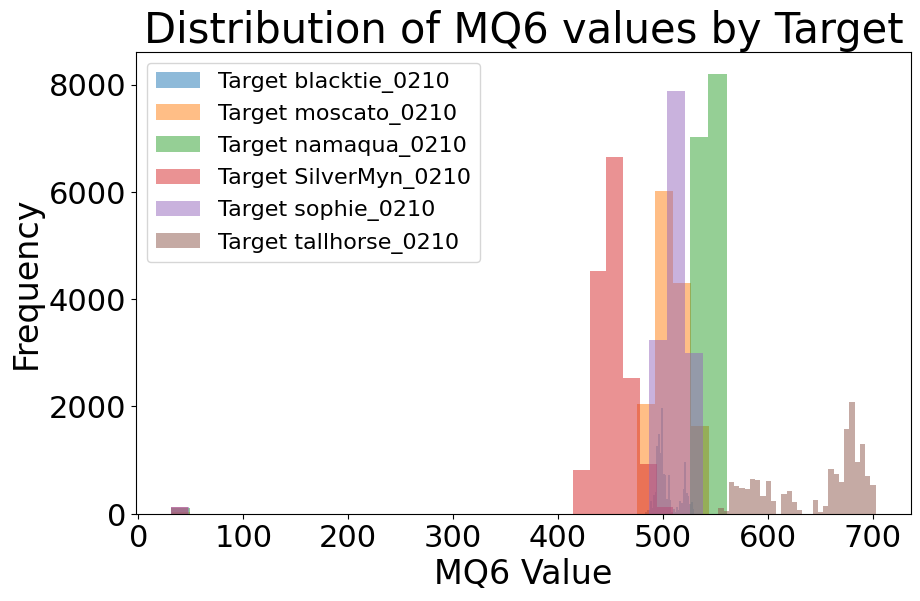

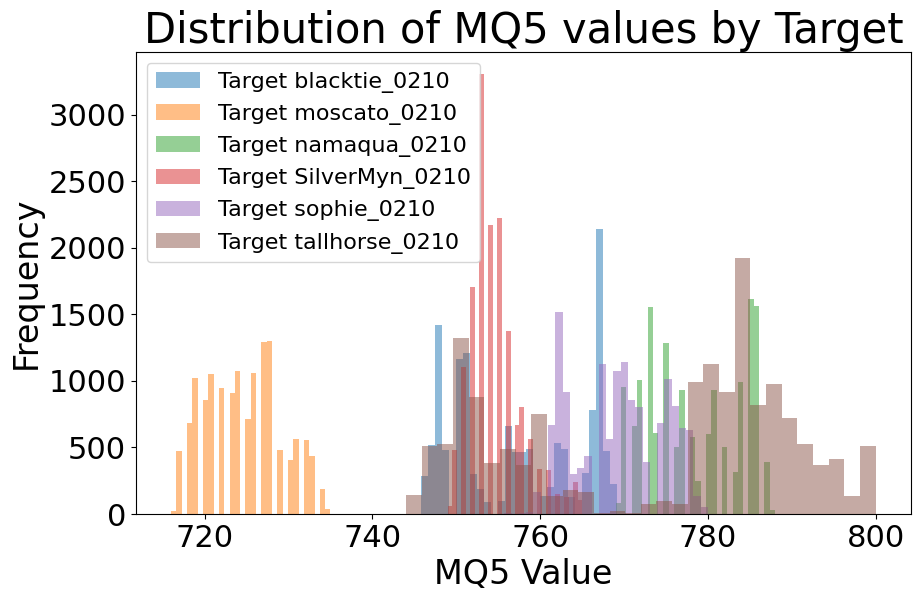

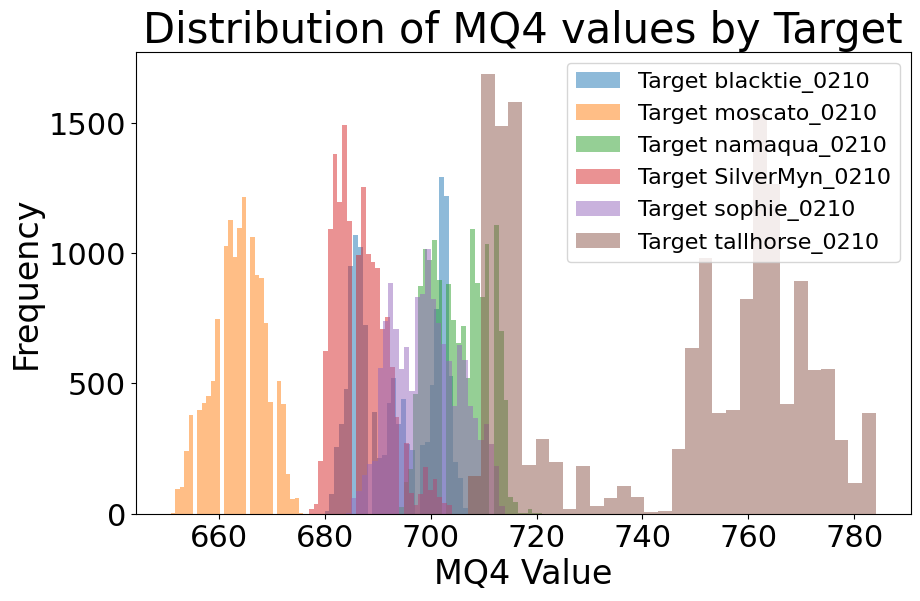

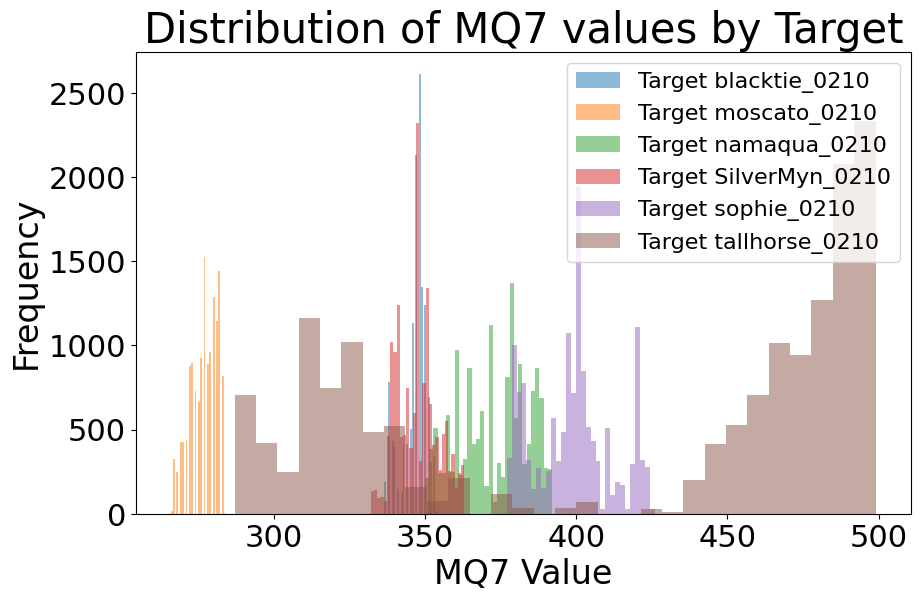

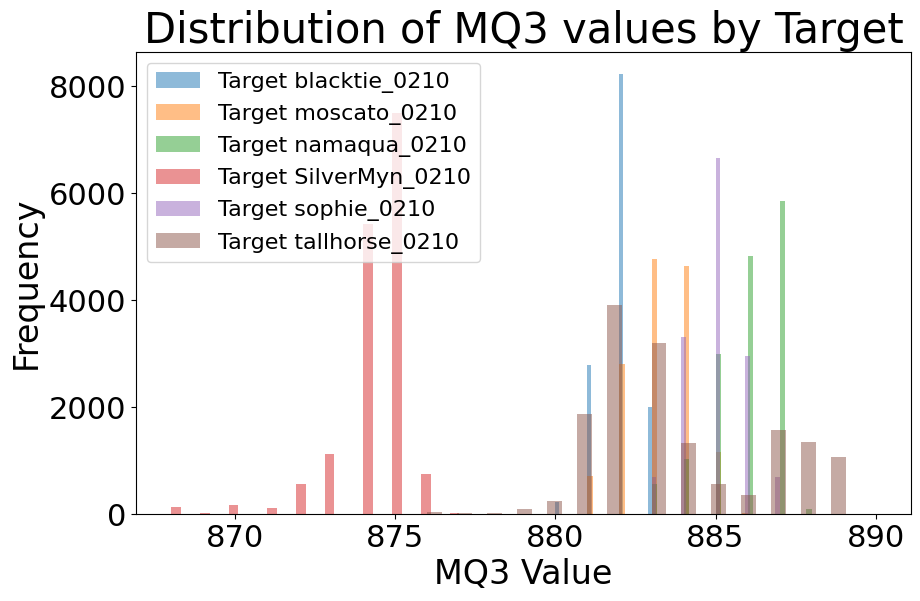

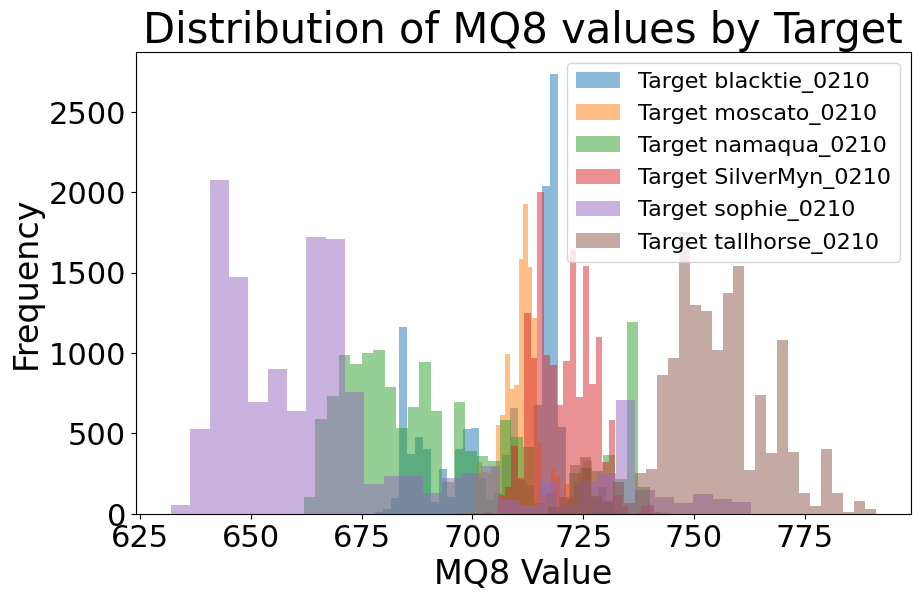

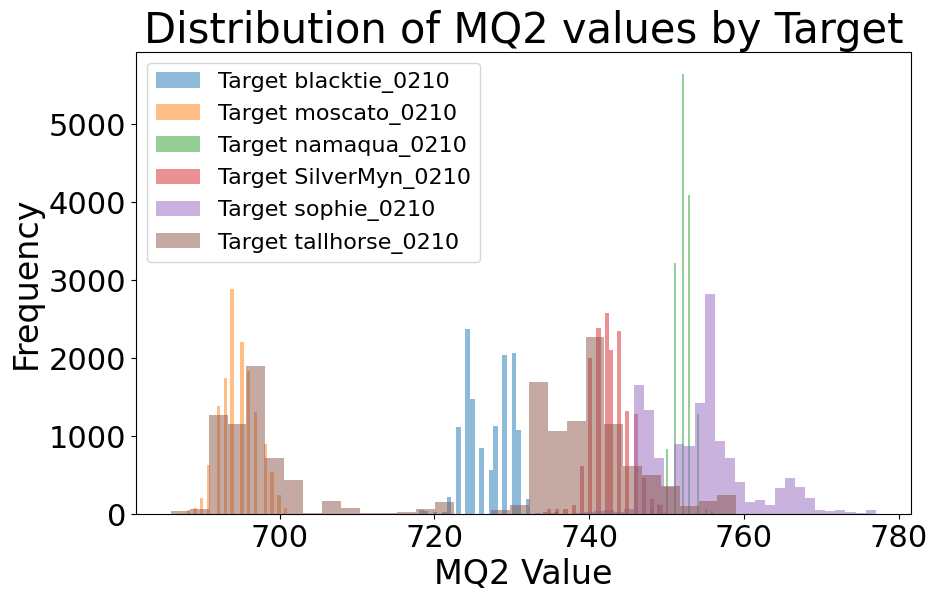

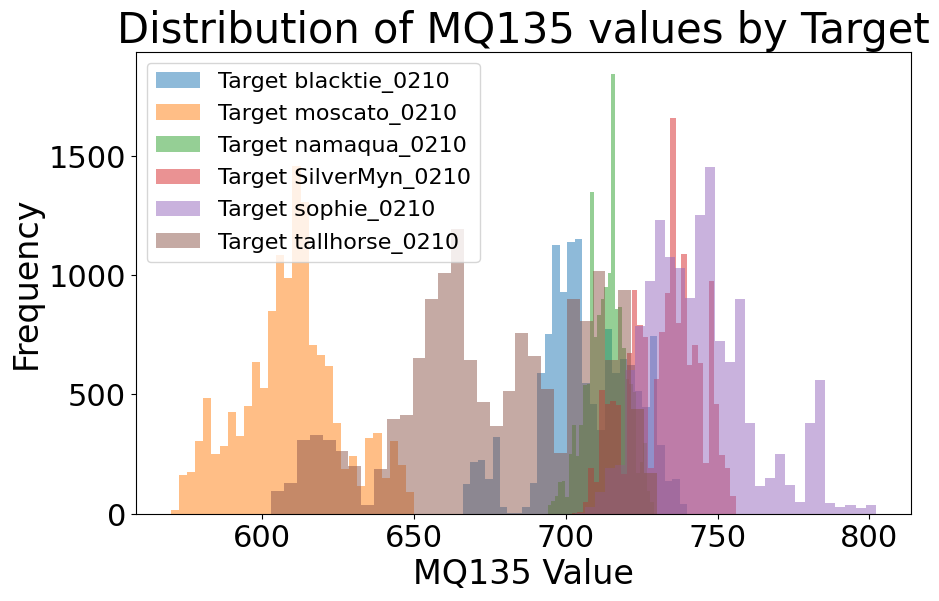

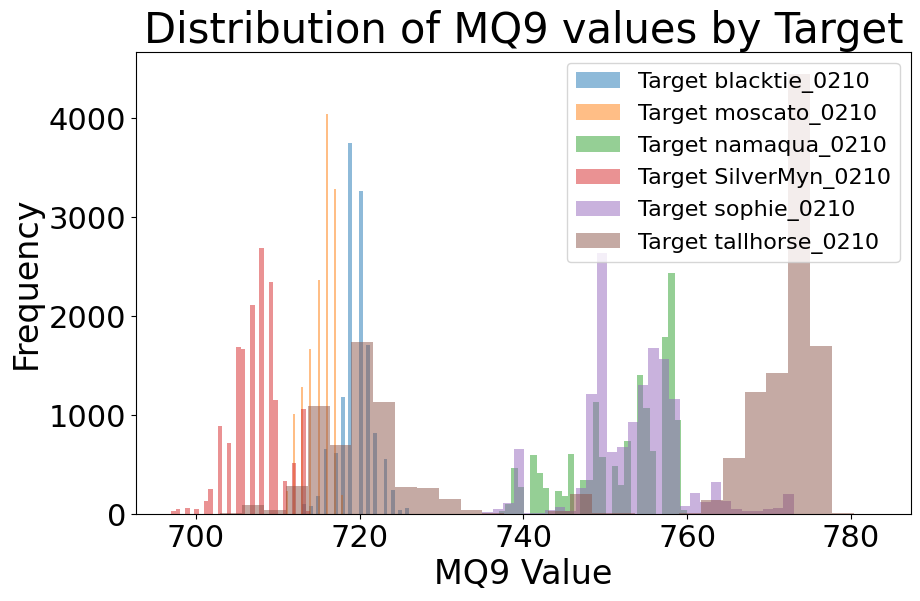

In [4]:
cleaner.plot_histograms(cleanedData)

In [5]:
dataToCluster = cleanedData.drop(columns=['yyyy-mm-dd timestamp','BMPTemperature','DHTTemperature','Humidity','Pressure(Pa)']
                          )  # Drop the timestamp column
        # Features excluding 'Target'

dataToCluster.head()

,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,Target
0,505.0,748,684.0,353,882,703,724,707,721.0,blacktie_0210
1,505.0,748,684.0,354,882,698,721,706,720.0,blacktie_0210
2,505.0,748,684.0,354,882,704,724,707,721.0,blacktie_0210
3,505.0,748,683.0,354,882,704,725,708,721.0,blacktie_0210
4,505.0,748,684.0,353,883,703,725,708,722.0,blacktie_0210


C:\Users\jessd\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


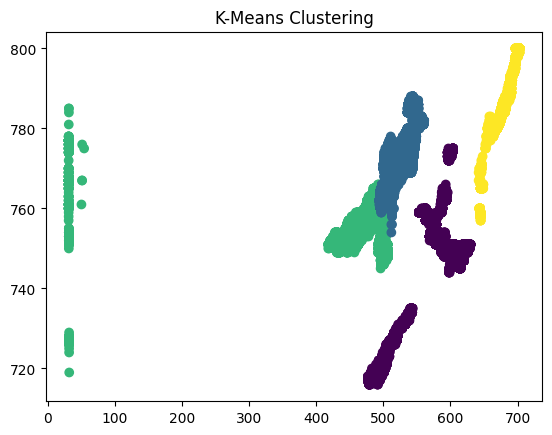

In [6]:
import numpy as np
from clustering import ClusteringTechniques  # Import your class from the file (if saved separately)

# Initialize the ClusteringTechniques class with your data
clustering = ClusteringTechniques(dataToCluster)

# Perform K-Means clustering
kmeans_labels = clustering.kmeans(n_clusters=4)

# Visualize the K-Means clustering result
clustering.visualize(kmeans_labels, "K-Means Clustering")

# Compare clustering results with actual wine types
results = clustering.evaluate_with_target(kmeans_labels)
# print(results)
# results.head()

In [7]:
dbscan_labels = clustering.dbscan(eps=40, min_samples=10)

clustering.visualize(dbscan_labels, "DBScan Clustering")


MemoryError: bad allocation

In [8]:
agglomerative_labels = clustering.agglomerative( n_clusters=4, linkage='average')

clustering.visualize(agglomerative_labels, "Agg Clustering")

MemoryError: Unable to allocate 28.9 GiB for an array with shape (3884373870,) and data type float64

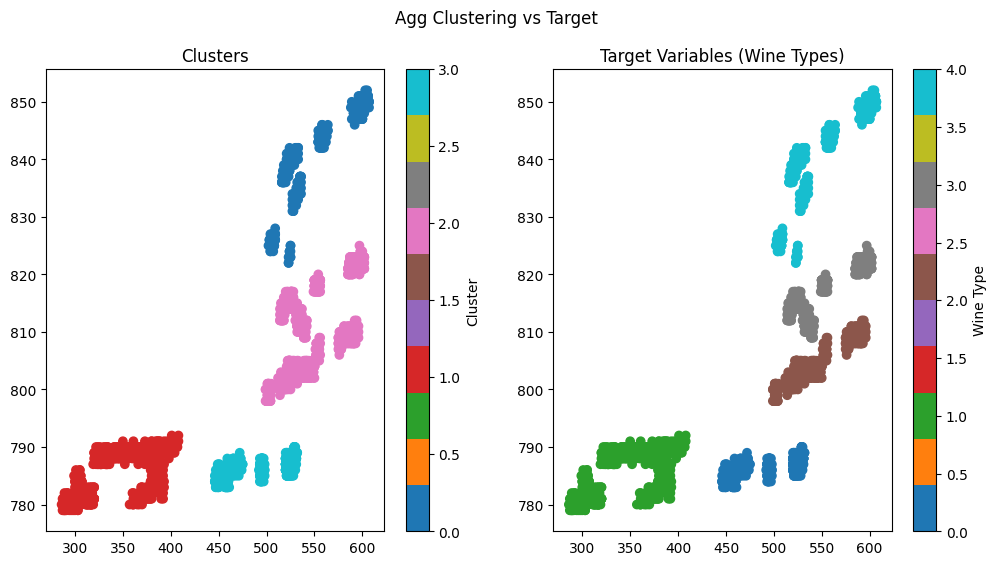

In [10]:
# clustering.visualize_with_targets(agglomerative_labels, "Agg Clustering vs Target")

In [9]:
results = clustering.evaluate_with_target(kmeans_labels)
print(results)

results.to_csv("cluster_results_kmeans", index=False)

       Cluster            Wine
0            2   blacktie_0210
1            2   blacktie_0210
2            2   blacktie_0210
3            2   blacktie_0210
4            2   blacktie_0210
...        ...             ...
15824        0  tallhorse_0210
15825        0  tallhorse_0210
15826        0  tallhorse_0210
15827        0  tallhorse_0210
15828        0  tallhorse_0210

[88141 rows x 2 columns]


<Axes: >

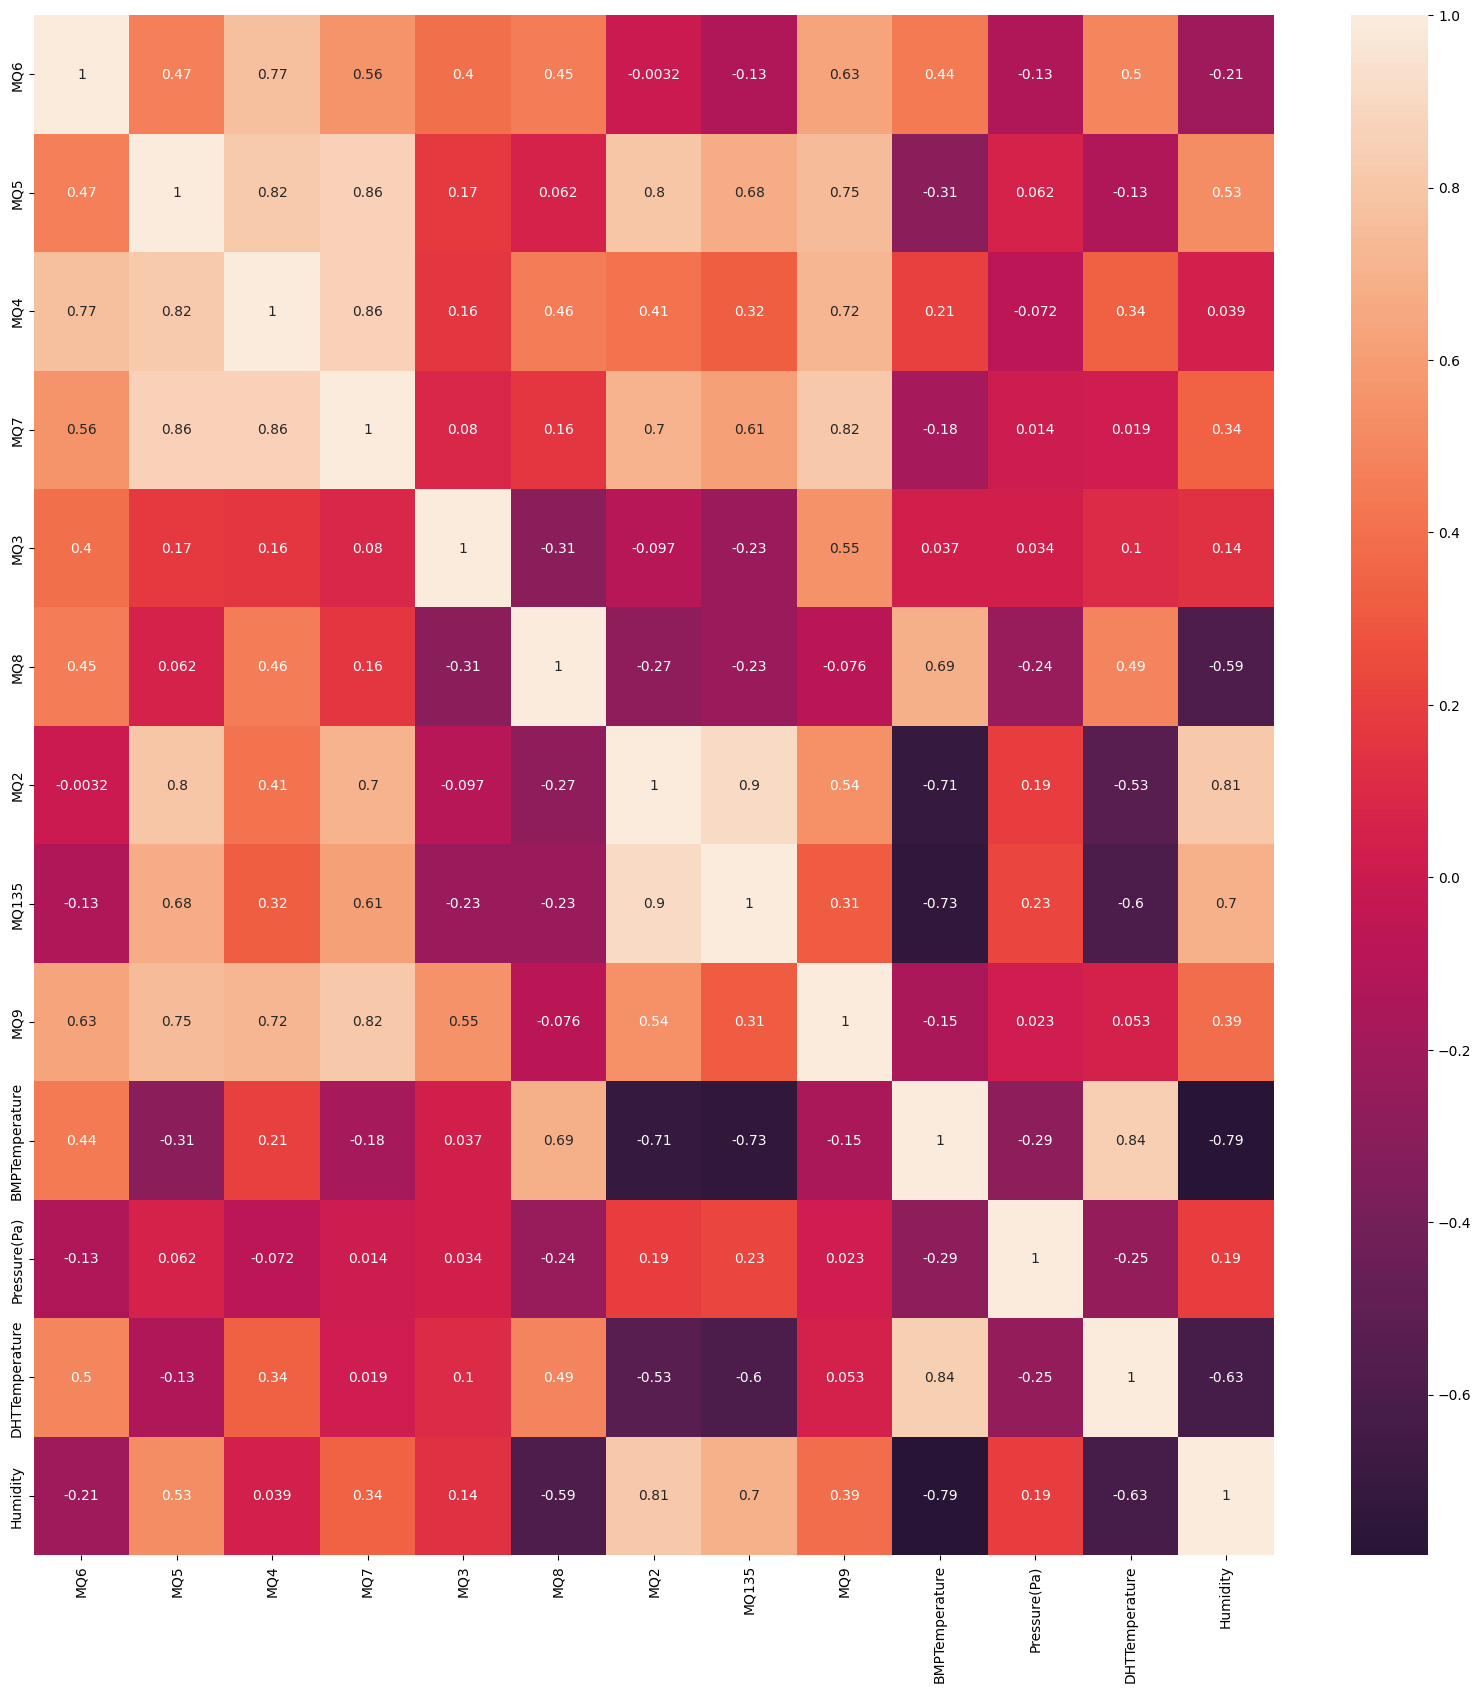

In [10]:
#correlation matrix

corrData = cleanedData.drop(columns=['yyyy-mm-dd timestamp','Target'])  # Drop the timestamp column

corrmat= corrData.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap="rocket", center=0)

<Axes: >

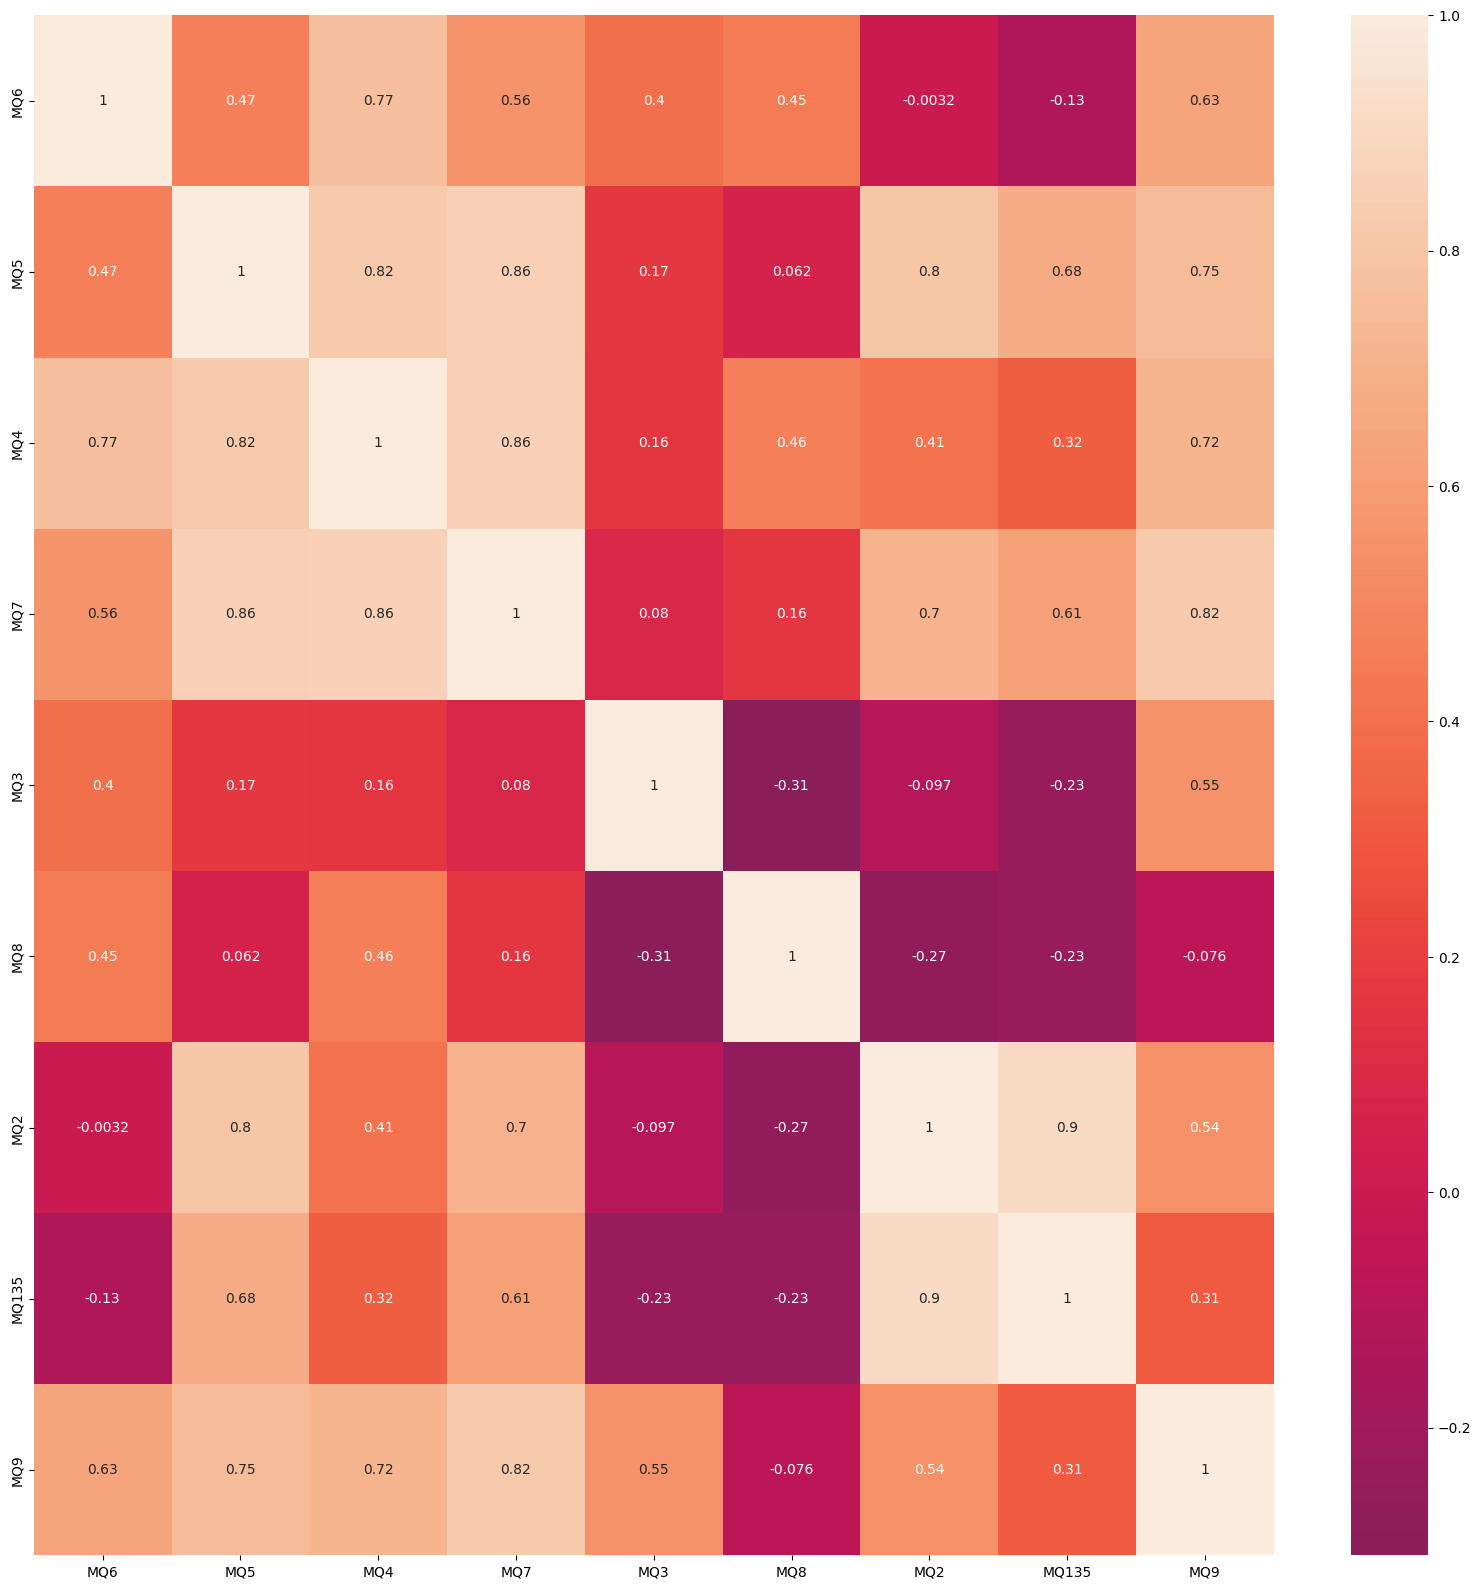

In [11]:
# drop temp pressure and humidity featers

corrData2 = cleanedData.drop(columns=['yyyy-mm-dd timestamp','BMPTemperature','DHTTemperature','Humidity','Pressure(Pa)', 'Target']
                          )  # Drop the timestamp column
        # Features excluding 'Target'

corrmat2 = corrData2.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat2,annot=True, cmap="rocket", center=0)

# Preprocess Data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = pd.DataFrame()

df = cleanedData.drop(columns=['yyyy-mm-dd timestamp', 'Target']
                          )  # Drop the timestamp column
        # Features excluding 'Target'

scaler.fit_transform(df)

scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

print("All features are now scaled")

All features are now scaled


In [10]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_df.head()

Dataframe to be used for further modelling:


,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity
0,-0.307438,-0.620638,-0.572982,-0.144927,-0.073630,-0.249407,-0.395714,0.196015,-0.552433,-0.309387,0.713918,-0.388836,-0.558942
1,-0.307438,-0.620638,-0.572982,-0.127182,-0.073630,-0.412097,-0.529635,0.174988,-0.596380,-0.309387,0.713918,-0.388836,-0.558942
2,-0.307438,-0.620638,-0.572982,-0.127182,-0.073630,-0.216870,-0.395714,0.196015,-0.552433,-0.309387,0.744536,-0.388836,-0.558942
3,-0.307438,-0.620638,-0.609810,-0.127182,-0.073630,-0.216870,-0.351074,0.217042,-0.552433,-0.309387,0.744536,-0.388836,-0.558942
4,-0.307438,-0.620638,-0.572982,-0.144927,0.165565,-0.249407,-0.351074,0.217042,-0.508486,-0.282101,0.811430,-0.388836,-0.558942


In [12]:
# Set pandas display option to show only 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_df.head()

Dataframe to be used for further modelling:


,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity
0,-0.31,-0.62,-0.57,-0.14,-0.07,-0.25,-0.40,0.20,-0.55,-0.31,0.71,-0.39,-0.56
1,-0.31,-0.62,-0.57,-0.13,-0.07,-0.41,-0.53,0.17,-0.60,-0.31,0.71,-0.39,-0.56
2,-0.31,-0.62,-0.57,-0.13,-0.07,-0.22,-0.40,0.20,-0.55,-0.31,0.74,-0.39,-0.56
3,-0.31,-0.62,-0.61,-0.13,-0.07,-0.22,-0.35,0.22,-0.55,-0.31,0.74,-0.39,-0.56
4,-0.31,-0.62,-0.57,-0.14,0.17,-0.25,-0.35,0.22,-0.51,-0.28,0.81,-0.39,-0.56


In [14]:
from sklearn.decomposition import PCA

#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,88141.0,-4.127454e-17,2.309338,-3.921226,-2.002046,-0.116566,0.826497,5.380854
col2,88141.0,-8.254907e-17,1.999053,-4.616514,-1.249540,-0.699202,0.018808,5.794717
col3,88141.0,1.031863e-17,1.259429,-2.114473,-1.019656,-0.173766,0.669254,3.789495


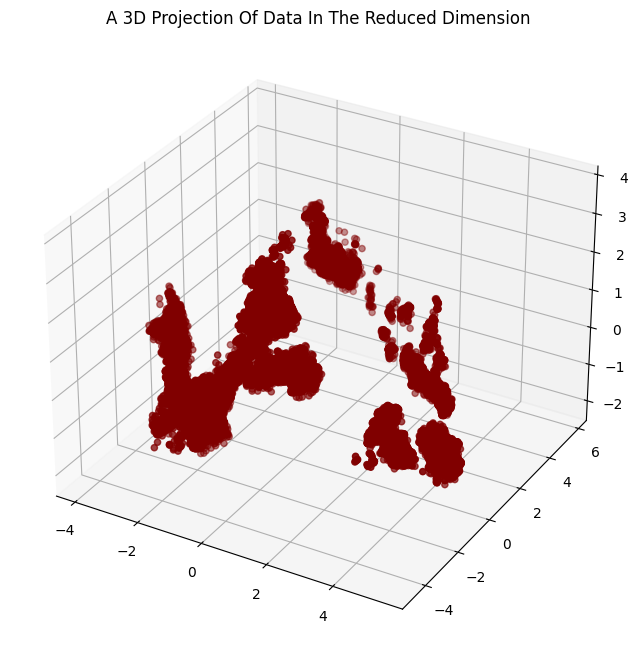

In [15]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

Performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot


Elbow Method to determine the number of clusters to be formed:


C:\Users\jessd\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jessd\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jessd\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jessd\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

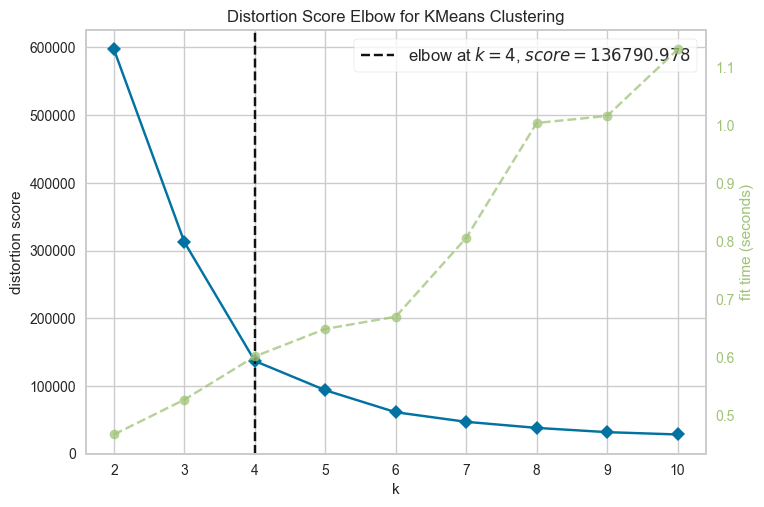

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [19]:
from sklearn.cluster import AgglomerativeClustering

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.

data = cleanedData
data["Clusters"]= yhat_AC

MemoryError: Unable to allocate 28.9 GiB for an array with shape (3884373870,) and data type float64

Upon feeding a dataset much larger than previous, it is conclusive that Agglomerative clustering scales poorly with large datasets. Consider switching to a different algorithm like Mini-Batch KMeans, which can handle larger datasets efficiently:

In [24]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=4, batch_size=1000)  # Set batch size appropriately
yhat_mbk = mbk.fit_predict(PCA_df)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.

data = cleanedData
data["Clusters"]= yhat_AC

C:\Users\jessd\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jessd\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MemoryError: Unable to allocate 28.9 GiB for an array with shape (3884373870,) and data type float64

Okay so that doesn't work well either:

Try HDBSCAN for hierarchical clustering with better scalability.

In [25]:
from hdbscan import HDBSCAN

hdb = HDBSCAN(min_cluster_size=500)  # Adjust based on dataset size
yhat_hdb = hdb.fit_predict(PCA_df)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.

data = cleanedData
data["Clusters"]= yhat_AC

ModuleNotFoundError: No module named 'hdbscan'

KeyError: 'Clusters'

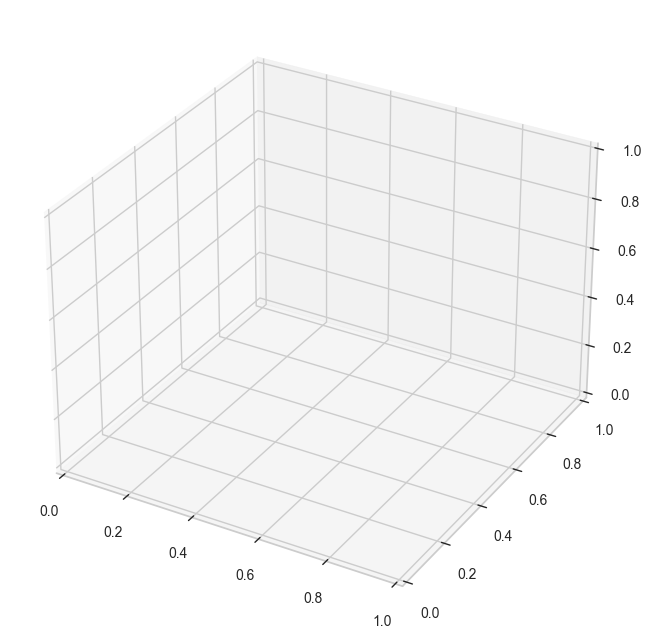

In [22]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = "Spectral" )
ax.set_title("The Plot Of The Clusters")
plt.show()

C:\Users\jessd\AppData\Local\Temp\ipykernel_6000\244764490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= "magma")


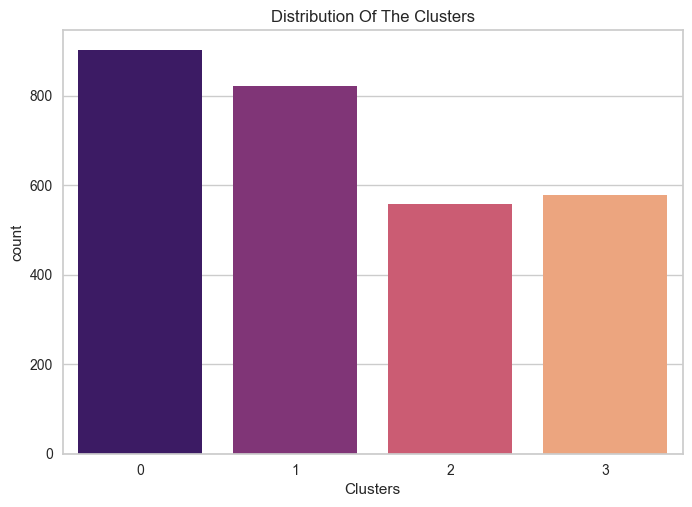

In [24]:
#Plotting countplot of clusters
pl = sns.countplot(x=data["Clusters"], palette= "magma")
pl.set_title("Distribution Of The Clusters")
plt.show()

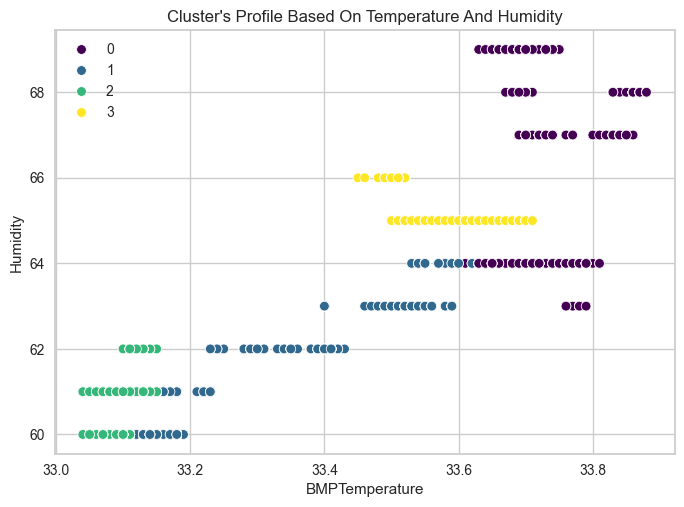

In [33]:
pl = sns.scatterplot(data = data,x=data["BMPTemperature"], y=data["Humidity"],hue=data["Clusters"], palette= "viridis")
pl.set_title("Cluster's Profile Based On Temperature And Humidity")
plt.legend()
plt.show()

Its probably best we remove that data point where humidity is so low compared to the rest.

In [31]:
filtered_data = data[data['Humidity'] < 40]
print(filtered_data)

    yyyy-mm-dd timestamp  MQ6  MQ5  MQ4  MQ7    MQ3  MQ8  MQ2  MQ135  MQ9  \
337  2024-09-23 13:22:53  524  840  801  418  920.0  763  744    786  717   

     BMPTemperature  Pressure(Pa)  DHTTemperature  Humidity  \
337           33.07       86208.4            34.0      34.0   

                          Target  Clusters  
337  TallHorse2309(25degEnvTemp)         2  


In [32]:
data.drop(data[data['Humidity'] < 40].index, inplace=True)

In [35]:
# plt.figure()
# pl=sns.swarmplot(x=data["Clusters"], y=data["BMPTemperature"], color= "#CBEDDD", alpha=0.5 )
# pl=sns.boxenplot(x=data["Clusters"], y=data["BMPTemperature"], palette=pal)
# plt.show()